Running Linear Regression script...
[Linear Regression] MAE=0.4545, RMSE=0.8589, R²=0.4206
Running Random Forest script...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.4s finished



Feature importances saved to: feature_importances_rf.csv
[Random Forest] MAE=0.3573, RMSE=0.7174, R²=0.5958
Running XGBoost script...

Feature importances saved to: feature_importances_xg.csv
[XGBoost] MAE=0.3462, RMSE=0.6710, R²=0.6464
Running MLP/LSTM script...
Epoch 1/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - loss: 0.6999 - val_loss: 30.6282
Epoch 2/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 0.5077 - val_loss: 18.8749
Epoch 3/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 0.4358 - val_loss: 9.5351
Epoch 4/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 0.3953 - val_loss: 6.2693
Epoch 5/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.3976 - val_loss: 2.6159
Epoch 6/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 0.3701 - val_loss: 2.3993
Epoch 7/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - loss: 0.3645 - val_loss: 2.1446
Epoch 8/30
647/647 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3566 - val_loss: 2.6557
Epoch 9/30
647/647 ━━━━━━━━━━━━

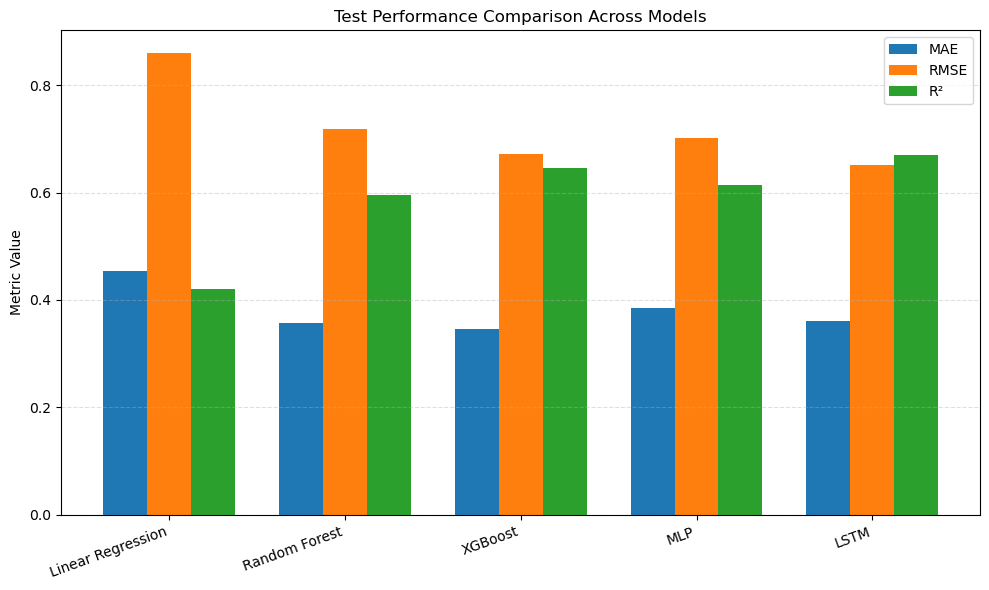

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

results = []

def add_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append([name, mae, rmse, r2])
    print(f"[{name}] MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

# ============================================
# 1. Linear Regression (Lasso / Ridge / Elastic Net – best model)
# ============================================

import Linear_Regression

print("Running Linear Regression script...")
lin_output = Linear_Regression.run_linear_regression()

y_test_lin = lin_output["y_test"]
y_pred_lin = lin_output["y_pred"]

add_metrics("Linear Regression", y_test_lin, y_pred_lin)



# ============================================
# 2. Random Forest
# ============================================

print("Running Random Forest script...")
%run tree.py

y_test_rf = y_test.copy()
y_pred_rf = y_pred.copy()

add_metrics("Random Forest", y_test_rf, y_pred_rf)


# ============================================
# 3. XGBoost
# ============================================

print("Running XGBoost script...")
%run XGBoost.py

y_test_xgb = y_test.copy()
y_pred_xgb = y_pred.copy()

add_metrics("XGBoost", y_test_xgb, y_pred_xgb)


# ============================================
# 4. MLP / LSTM（train_nn_models.py）
# ============================================

print("Running MLP/LSTM script...")
import train_nn_models

nn_results = train_nn_models.main()

y_pred_mlp = nn_results["y_pred_mlp"]
y_pred_lstm = nn_results["y_pred_lstm"]
test_df_nn = nn_results["test_df"]
y_test_seq_nn = nn_results["y_test_seq"]

add_metrics("MLP", test_df_nn["future_6h_consumption"].values, y_pred_mlp)
add_metrics("LSTM", y_test_seq_nn, y_pred_lstm)


# ============================================
# 5. Organize the results and plot
# ============================================

cols = ["model", "MAE", "RMSE", "R2"]
metrics_df = pd.DataFrame(results, columns=cols)
print("\n=== All model metrics ===")
print(metrics_df)

x = np.arange(len(metrics_df))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, metrics_df["MAE"], width, label="MAE")
plt.bar(x,        metrics_df["RMSE"], width, label="RMSE")
plt.bar(x + width,metrics_df["R2"], width, label="R²")

plt.xticks(x, metrics_df["model"], rotation=20, ha="right")
plt.ylabel("Metric Value")
plt.title("Test Performance Comparison Across Models")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
